# Examination of the Change in Sonic Features of Viral Music following the COVID-19 Pandemic (by Gene Park)

## Is there a significant difference in sonic features of viral music (Acousticness & Danceability) before and after COVID-19?

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib as plt
import os
from datetime import date, timedelta, datetime
import scipy
import seaborn as sns
import pingouin as pg

### Create Dataset of Date x Average Sonic Features of Top 200 Songs for that date

#### Check availability of data/date

In [70]:
viral_songs_dir="/Spotify_Project/data/viral_songs_data/processed/"

file_list=os.listdir(viral_songs_dir)
file_list=file_list[1:]
file_list

['2017-01-01.csv',
 '2017-01-02.csv',
 '2017-01-03.csv',
 '2017-01-04.csv',
 '2017-01-05.csv',
 '2017-01-06.csv',
 '2017-01-07.csv',
 '2017-01-08.csv',
 '2017-01-09.csv',
 '2017-01-10.csv',
 '2017-01-11.csv',
 '2017-01-12.csv',
 '2017-01-13.csv',
 '2017-01-14.csv',
 '2017-01-15.csv',
 '2017-01-16.csv',
 '2017-01-17.csv',
 '2017-01-18.csv',
 '2017-01-19.csv',
 '2017-01-20.csv',
 '2017-01-21.csv',
 '2017-01-22.csv',
 '2017-01-23.csv',
 '2017-01-24.csv',
 '2017-01-25.csv',
 '2017-01-26.csv',
 '2017-01-27.csv',
 '2017-01-28.csv',
 '2017-01-29.csv',
 '2017-01-30.csv',
 '2017-01-31.csv',
 '2017-02-01.csv',
 '2017-02-02.csv',
 '2017-02-03.csv',
 '2017-02-04.csv',
 '2017-02-05.csv',
 '2017-02-06.csv',
 '2017-02-07.csv',
 '2017-02-08.csv',
 '2017-02-09.csv',
 '2017-02-10.csv',
 '2017-02-11.csv',
 '2017-02-12.csv',
 '2017-02-13.csv',
 '2017-02-14.csv',
 '2017-02-15.csv',
 '2017-02-16.csv',
 '2017-02-17.csv',
 '2017-02-18.csv',
 '2017-02-19.csv',
 '2017-02-20.csv',
 '2017-02-21.csv',
 '2017-02-22

In [72]:
#Create one row per date for all available dates

spotify_df=pd.DataFrame(columns=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'])

for file in file_list:
    file_path=pd.read_csv(viral_songs_dir+file)
    df=pd.read_csv(viral_songs_dir+file)
    df=df.drop(columns=['Position', 'Track Name', 'Artist','time_signature'])
    df = df.astype(float)
    df=df.T
    df['avg'] = df.mean(axis=1)
    df=df.T
    avg_df=df.tail(1)
    avg_df=avg_df.rename(index={'avg': file[:-4]})
    spotify_df=spotify_df.append(avg_df)

In [73]:
spotify_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
2017-01-01,0.58604,0.540638,5.46,-9.74242,0.60,0.091314,0.294944,0.111262,0.214458,0.432846,116.52466,262757.24
2017-01-02,0.59226,0.577738,5.72,-8.46090,0.58,0.110726,0.266143,0.096317,0.226536,0.435590,115.17006,243643.28
2017-01-03,0.62854,0.570476,5.20,-8.31670,0.46,0.117350,0.297884,0.052159,0.204582,0.420838,118.45196,231687.44
2017-01-04,0.62668,0.600758,5.16,-7.61724,0.50,0.112166,0.291627,0.052730,0.214920,0.423678,122.79866,230722.88
2017-01-05,0.63298,0.585078,5.22,-7.59562,0.46,0.107194,0.318535,0.060202,0.221846,0.430878,121.15078,225802.20
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,0.71260,0.604420,5.14,-6.78208,0.66,0.148506,0.230327,0.016721,0.165498,0.522020,125.41074,195966.26
2020-09-26,0.71052,0.590380,5.14,-7.09464,0.66,0.138076,0.239623,0.017630,0.162988,0.524500,127.74766,195495.84
2020-09-27,0.70812,0.596240,5.16,-7.01202,0.68,0.143638,0.243763,0.017630,0.164080,0.525020,127.06734,196261.40
2020-09-28,0.68910,0.605600,4.88,-7.10082,0.70,0.124082,0.244487,0.034923,0.180360,0.538440,125.38648,198002.38


In [10]:
spotify_df.to_excel("./spotify_avg_viral_50.xlsx")

### Viral 50 data was modified on excel to add 'year' to the rows

In [74]:
spotify_df=pd.read_csv("../data/spotify_avg_viral_50_final.csv")
spotify_df['year'] = spotify_df['year'].astype(int)
spotify_df

,date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,2017-03-11,0.64798,0.59072,5.30,-6.75078,0.60,0.074722,0.298348,0.047989,0.155850,0.457288,115.85618,218643.36,2017
1,2017-03-12,0.64636,0.57686,5.18,-7.09456,0.60,0.086514,0.301524,0.059913,0.155638,0.432308,118.32086,218401.08,2017
2,2017-03-13,0.58882,0.59418,4.64,-7.26060,0.60,0.097406,0.313383,0.054871,0.155874,0.421246,118.69200,225813.82,2017
3,2017-03-14,0.57906,0.58010,5.22,-7.48796,0.60,0.091358,0.310577,0.050332,0.144024,0.414488,118.77846,223874.02,2017
4,2017-03-15,0.60222,0.56972,4.86,-7.62808,0.60,0.097148,0.294368,0.038304,0.139610,0.406934,114.82786,223942.24,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2020-09-25,0.71260,0.60442,5.14,-6.78208,0.66,0.148506,0.230327,0.016721,0.165498,0.522020,125.41074,195966.26,2020
808,2020-09-26,0.71052,0.59038,5.14,-7.09464,0.66,0.138076,0.239623,0.017630,0.162988,0.524500,127.74766,195495.84,2020
809,2020-09-27,0.70812,0.59624,5.16,-7.01202,0.68,0.143638,0.243763,0.017630,0.164080,0.525020,127.06734,196261.40,2020
810,2020-09-28,0.68910,0.60560,4.88,-7.10082,0.70,0.124082,0.244487,0.034923,0.180360,0.538440,125.38648,198002.38,2020


### Filter only dates in 2019 and 2020

In [75]:
spotify_df = spotify_df[spotify_df.year != 2018]
spotify_df = spotify_df[spotify_df.year != 2017]
spotify_df

,date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
406,2019-03-11,0.71196,0.646080,5.72,-6.21440,0.58,0.157756,0.185288,0.010656,0.162748,0.516960,123.91008,195480.90,2019
407,2019-03-12,0.71068,0.640340,5.68,-6.22694,0.56,0.157626,0.183438,0.010656,0.163246,0.499822,123.22738,195563.74,2019
408,2019-03-13,0.70198,0.624056,5.70,-6.84176,0.58,0.157650,0.203064,0.028036,0.155224,0.492880,121.83716,197696.54,2019
409,2019-03-14,0.71344,0.624900,5.62,-6.49460,0.56,0.156188,0.208454,0.026856,0.157226,0.492782,122.19236,196450.00,2019
410,2019-03-15,0.71944,0.619740,5.64,-6.58408,0.56,0.159834,0.209452,0.026856,0.155390,0.497502,121.05606,195792.14,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2020-09-25,0.71260,0.604420,5.14,-6.78208,0.66,0.148506,0.230327,0.016721,0.165498,0.522020,125.41074,195966.26,2020
808,2020-09-26,0.71052,0.590380,5.14,-7.09464,0.66,0.138076,0.239623,0.017630,0.162988,0.524500,127.74766,195495.84,2020
809,2020-09-27,0.70812,0.596240,5.16,-7.01202,0.68,0.143638,0.243763,0.017630,0.164080,0.525020,127.06734,196261.40,2020
810,2020-09-28,0.68910,0.605600,4.88,-7.10082,0.70,0.124082,0.244487,0.034923,0.180360,0.538440,125.38648,198002.38,2020


## I hypothesize that 2020 acousticness will be greater than 2019 acousticness

### Describe datasets and visualize them

In [76]:
spotify_df[['year','acousticness']].groupby('year').describe()

acousticness                                                              \
            count      mean       std       min       25%       50%       75%   
year                                                                            
2019        203.0  0.209980  0.025065  0.149407  0.192488  0.209452  0.227263   
2020        203.0  0.269991  0.036985  0.208388  0.240488  0.270347  0.291797   

                
           max  
year            
2019  0.271077  
2020  0.403832

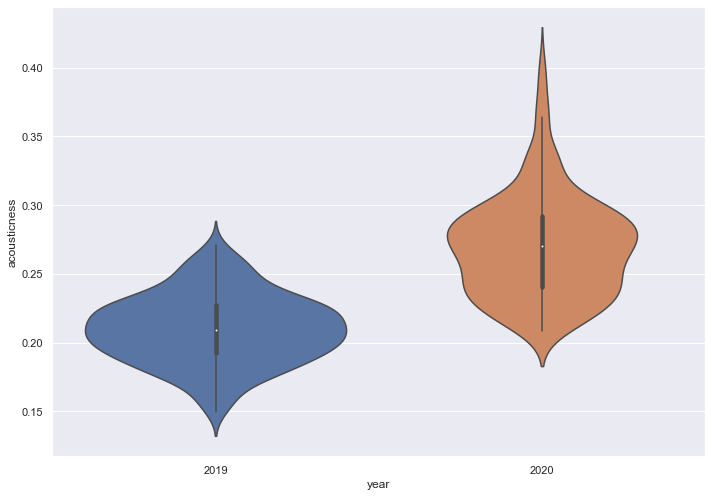

In [77]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="year", y="acousticness", data=spotify_df)

### Check Normalization of Samples to determine which tests to run

In [78]:
acousticness_2019 = spotify_df[spotify_df['year']==2019]['acousticness']
acousticness_2020 = spotify_df[spotify_df['year']==2020]['acousticness']

print(stats.shapiro(acousticness_2019))
print(stats.shapiro(acousticness_2020))

ShapiroResult(statistic=0.9948685169219971, pvalue=0.7208318114280701)
ShapiroResult(statistic=0.9558190107345581, pvalue=6.1582391026604455e-06)


According to the Shapiro-Wilks test, while 2019 acousticness follows a normal distribution, 2020 acousticness does not. Hence, we use the Mann Whitney U Test, a non-parametric test, to check the difference between the two years.

### Perform Mann Whitney U Test

In [79]:
scipy.stats.mannwhitneyu(acousticness_2019, acousticness_2020, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=3223.0, pvalue=6.270909232096797e-49)

As the p-value is less than 0.05, the acousticness of viral music in 2020 (Post-COVID-19 declaration) is significantly greater than the acousticness of 2019.

## I hypothesize that 2020 danceability will be lower than 2019 danceability

In [80]:
spotify_df[['year','danceability']].groupby('year').describe()

danceability                                                          \
            count      mean       std      min      25%      50%      75%   
year                                                                        
2019        203.0  0.728722  0.016803  0.69038  0.71741  0.72902  0.74008   
2020        203.0  0.708425  0.018637  0.64968  0.69808  0.70844  0.72145   

               
          max  
year           
2019  0.76054  
2020  0.74498

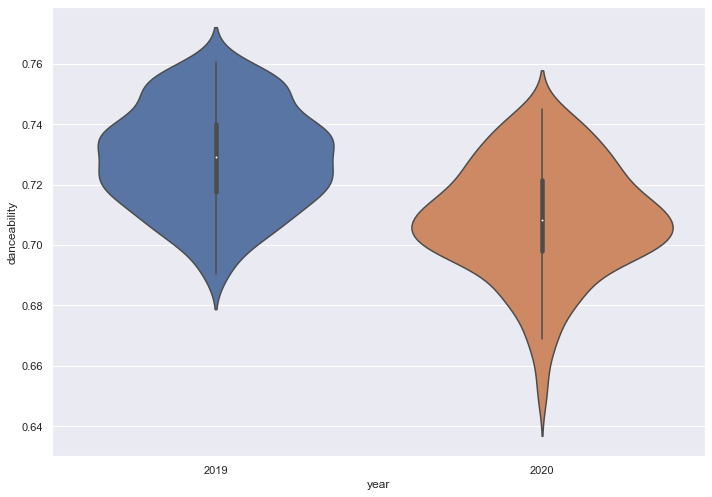

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="year", y="danceability", data=spotify_df)

In [82]:
danceability_2019 = spotify_df[spotify_df['year']==2019]['danceability']
danceability_2020 = spotify_df[spotify_df['year']==2020]['danceability']

print(stats.shapiro(danceability_2019))
print(stats.shapiro(danceability_2020))

ShapiroResult(statistic=0.9818556904792786, pvalue=0.010096251964569092)
ShapiroResult(statistic=0.9839100241661072, pvalue=0.020374655723571777)


In [83]:
scipy.stats.mannwhitneyu(danceability_2019, danceability_2020, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=32379.5, pvalue=2.2904577655741613e-23)

As the p-value is less than 0.05, the danceability of viral music in 2020 (Post-COVID-19 declaration) is significantly less than the danceability of 2019.